In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("tvmarketing.csv")

In [3]:
print("\n\nThe first five rows in the dataset is:\n\n",df.head())



The first five rows in the dataset is:

       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [4]:
# 2. Check column data types
print("Check data types of csv : \n" , df.dtypes)

Check data types of csv : 
 TV       float64
Sales    float64
dtype: object


In [5]:
df.shape

(200, 2)

In [6]:
df.columns.tolist()

['TV', 'Sales']

In [7]:
df.shape[1]

2

In [8]:
df.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [9]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


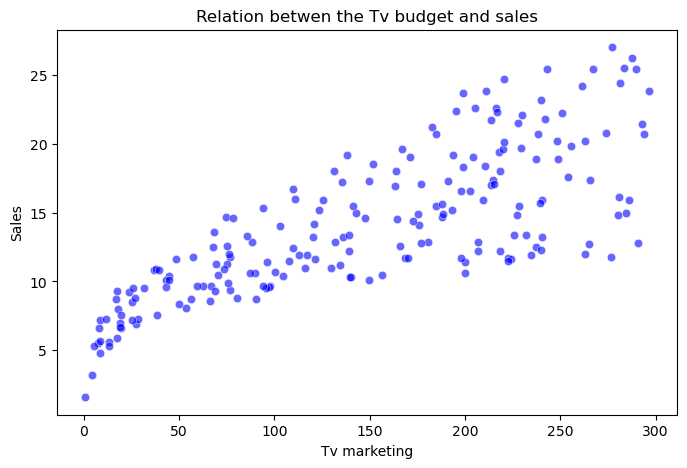

In [47]:
# visualise the realtionship between the features and dependent variables using the scatter plot

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['TV'],y=df['Sales'],color='blue',alpha=0.6)
plt.title("Relation betwen the Tv budget and sales")
plt.xlabel("Tv marketing")
plt.ylabel("Sales")
plt.show()

In [10]:
# prepare x and y
X=df[['TV']]
y=df[['Sales']]

In [11]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(140, 1)
(60, 1)


In [15]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values

# Convert training data to numpy arrays
X_train_np = X_train.values.flatten()  # flatten to 1D array
y_train_np = y_train.values

# Calculate means
mean_x = np.mean(X_train_np)
mean_y = np.mean(y_train_np)

# Calculate slope (b1)
numerator = np.sum((X_train_np - mean_x) * (y_train_np - mean_y))
denominator = np.sum((X_train_np - mean_x)**2)
b1 = numerator / denominator

# Calculate intercept (b0)
b0 = mean_y - b1 * mean_x

print("\nManual Linear Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)


Manual Linear Regression Coefficients:
Intercept (b0): 14.49714285714286
Slope (b1): -1.0108632568250123e-17


In [16]:
# create a model using calculated coefficients and make predictions on the testing data
y_pred=b0+b1*X_test
y_pred[:5]

,TV
95,14.497143
15,14.497143
30,14.497143
158,14.497143
128,14.497143


In [17]:
# perform linear regression using the library sklearn
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
# 12.Print the intercept and coefficients

print("\nscikit-learn Linear Regression Coefficients:")
print("Intercept:", lr.intercept_)
print("Coefficient for TV:", lr.coef_[0])


scikit-learn Linear Regression Coefficients:
Intercept: [7.23945983]
Coefficient for TV: [0.0464078]


In [19]:
# predict sales for test set
y_pred=lr.predict(X_test)
 # display first few predictions
y_pred[:5]

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864]])

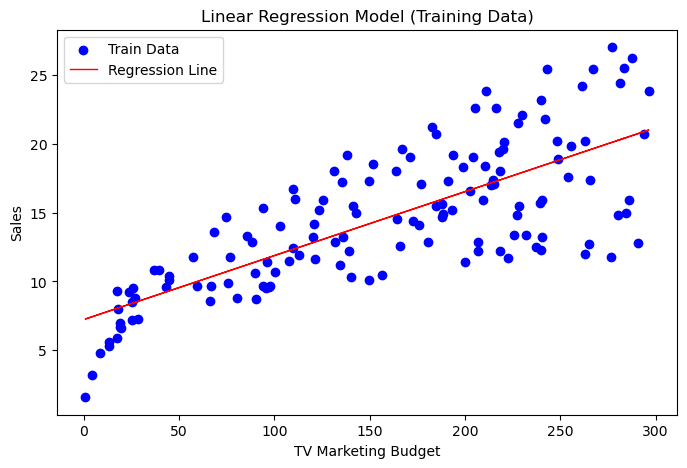

In [53]:
# plot train data and model using the pyplot

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label="Train Data")
plt.plot(X_train, lr.predict(X_train), color='red', linewidth=1, label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Training Data)")
plt.legend()
plt.show()


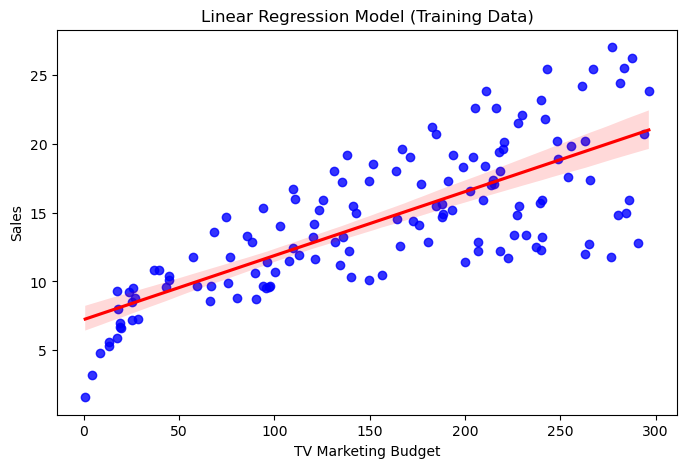

In [54]:
# 14.Plot train data and the model using seaborn

plt.figure(figsize=(8, 5))
sns.regplot(x=X_train, y=y_train, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Training Data)")
plt.show()

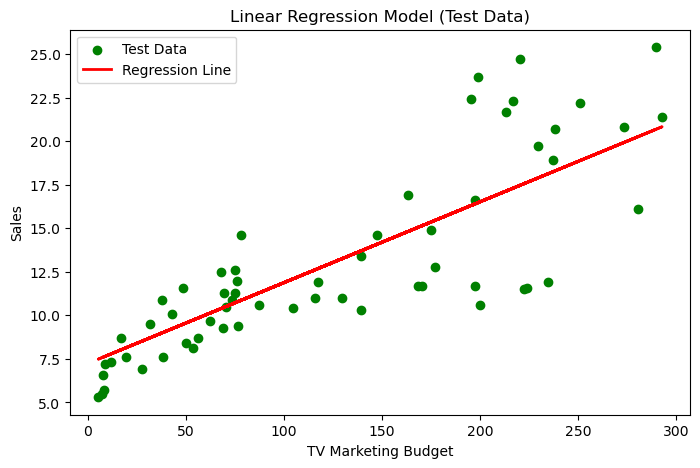

In [55]:
# 15.Plot test data and the model

# using pyplot

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_test, lr.predict(X_test), color='red', linewidth=2, label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Test Data)")
plt.legend()
plt.show()


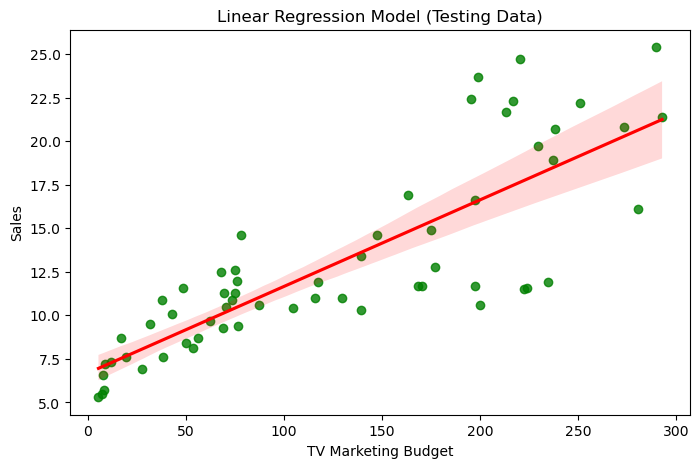

In [56]:
# 15.Plot test data and the model

# using seaborn

plt.figure(figsize=(8, 5))
sns.regplot(x=X_test, y=y_test, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression Model (Testing Data)")
plt.show()

In [20]:
# 16.Print Mean Squared Error and R Squared Value


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 8.970991242413616
R² Score: 0.6714477229302764


In [60]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

# Convert test data and predictions to numpy arrays (if not already)
y_test_np = y_test.values
n = len(y_test_np)
p = 1

# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
